<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/A_predictive_Stock_Market_Technical_Analysis_Using_Fuzzy_Logic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=470914bcca30b3bd6d1d478269bcb3445330db67c1e78717179f019324baa541
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


12.810363199226463


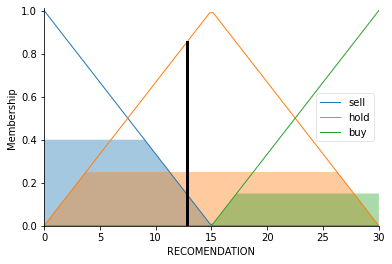

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
#INPUT
X_MACD=np.linspace(-1000,1000,num=1000)
X_RSI=np.linspace(0,140,num=200)
X_SO=np.linspace(0,160,num=200)
X_OBV=np.linspace(-500,500,num=500)
X_RECOMENDATION=np.linspace(0,30,num=100)
MACD=ctrl.Antecedent(X_MACD,"MACD")
RSI=ctrl.Antecedent(X_MACD,"RSI")
SO=ctrl.Antecedent(X_MACD,"SO")
OBV=ctrl.Antecedent(X_MACD,"OBV")
RECOMENDATION=ctrl.Consequent(X_RECOMENDATION,"RECOMENDATION")
names_MACD=['Low','High']
names_RSI=['Low','Medium','High']
names_SO=['Low','Medium','High']
names_OBV=["Low",'High']
names_RECOMENDATION=['sell','hold','buy']
MACD.automf(names=names_MACD)
RSI.automf(names=names_RSI)
SO.automf(names=names_SO)
OBV.automf(names=names_OBV)
RECOMENDATION.automf(names=names_RECOMENDATION)
rule1 = ctrl.Rule(MACD['High'] & RSI['High']& SO['High']& OBV['High'], RECOMENDATION['sell'])
rule2 = ctrl.Rule(MACD['High'] & RSI['High']& SO['Medium']& OBV['High'], RECOMENDATION['sell'])
rule3 = ctrl.Rule(MACD['High'] & RSI['High']& SO['Low']& OBV['High'], RECOMENDATION['sell'])
rule4 = ctrl.Rule(MACD['High'] & RSI['Medium']& SO['High']& OBV['High'], RECOMENDATION['sell'])
rule5 = ctrl.Rule(MACD['High'] & RSI['Medium']& SO['Medium']& OBV['Low'], RECOMENDATION['sell'])
rule6 = ctrl.Rule(MACD['High'] & RSI['Medium']& SO['Low']& OBV['Low'], RECOMENDATION['hold'])
rule7 = ctrl.Rule(MACD['Low'] & RSI['Low']& SO['High']& OBV['Low'], RECOMENDATION['buy'])
rule8 = ctrl.Rule(MACD['Low'] & RSI['Low']& SO['Medium']& OBV['Low'], RECOMENDATION['buy'])
rule9 = ctrl.Rule(MACD['Low'] & RSI['Medium']& SO['High']& OBV['High'], RECOMENDATION['buy'])
rule10 = ctrl.Rule(MACD['Low'] & RSI['Medium']& SO['Medium']& OBV['Low'], RECOMENDATION['hold'])
rule11= ctrl.Rule(MACD['Low'] & RSI['Medium']& SO['Low']& OBV['Low'], RECOMENDATION['buy'])
rule12 = ctrl.Rule(MACD['Low'] & RSI['High']& SO['Low']& OBV['High'], RECOMENDATION['buy'])
system_ctrl=ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['MACD'] = 500
system.input['RSI'] = 100
system.input['SO'] = 150
system.input['OBV'] = 200
system.compute()
print(system.output['RECOMENDATION'])
RECOMENDATION.view(sim=system)

